In [1]:
# importing Required Libraries

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils.vis_utils import plot_model


11501568/11490434 [==============================] - 0s 0us/step


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

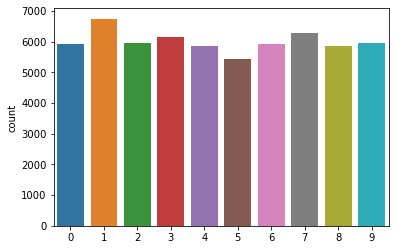

In [2]:
# loading the MNIST dataset

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

sns.countplot(y_train)

In [3]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [4]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


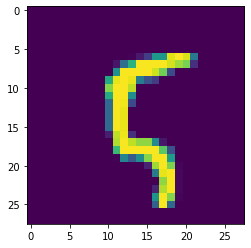

In [5]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [6]:
X_train_plot = x_train.reshape(-1, 28, 28)

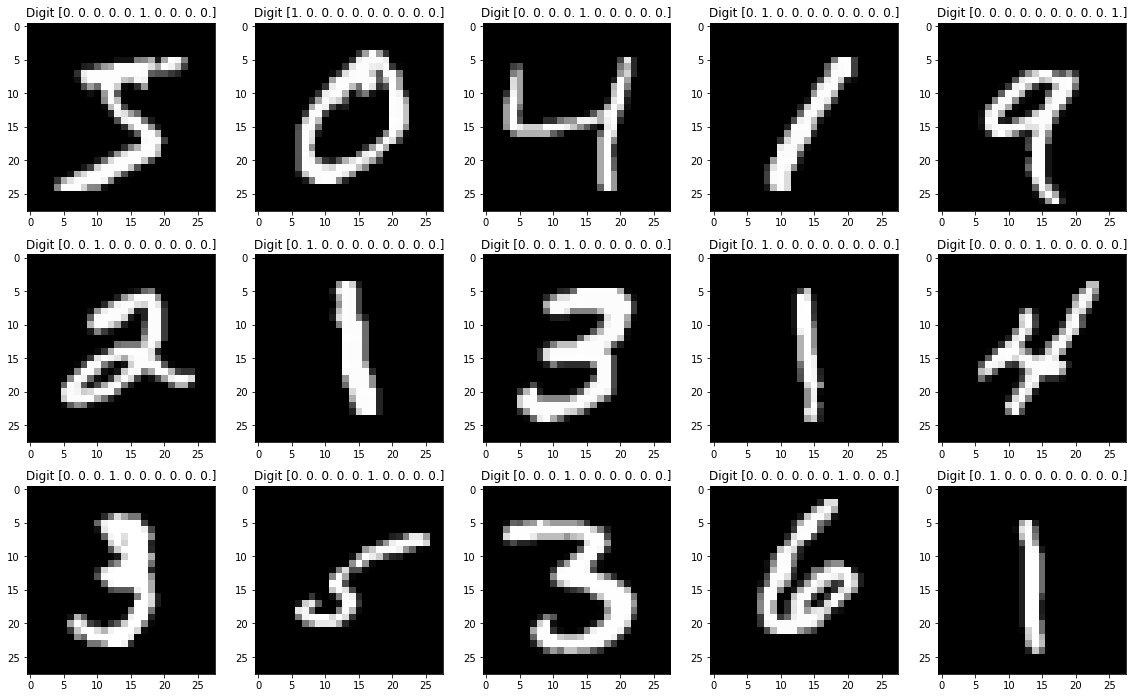

In [7]:
def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for idx in range(15):
        plt.subplot(5, 5,idx+1)
        plt.imshow(X_train_plot[idx], cmap = mono)
        plt.title("Digit {}".format(y_train[idx]))
        
    plt.tight_layout()   
Show_example_digits()

In [8]:
# determine the shape of the input images
inp_shape = x_train.shape[1:]
print(inp_shape)

(28, 28, 1)


In [9]:
batch_size = 64
num_classes = 10
epochs = 10

In [10]:
# defining the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [11]:
# text Description of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 250s 295ms/step - loss: 0.2157 - acc: 0.9340 - val_loss: 0.0394 - val_acc: 0.9893
Epoch 2/10
844/844 [==============================] - 248s 294ms/step - loss: 0.0761 - acc: 0.9787 - val_loss: 0.0448 - val_acc: 0.9890
Epoch 3/10
844/844 [==============================] - 245s 290ms/step - loss: 0.0589 - acc: 0.9835 - val_loss: 0.0316 - val_acc: 0.9917
Epoch 4/10
844/844 [==============================] - 247s 292ms/step - loss: 0.0516 - acc: 0.9856 - val_loss: 0.0366 - val_acc: 0.9903
Epoch 5/10
844/844 [==============================] - 243s 288ms/step - loss: 0.0469 - acc: 0.9869 - val_loss: 0.0261 - val_acc: 0.9942
Epoch 6/10
844/844 [==============================] - 243s 288ms/step - loss: 0.0450 - acc: 0.9876 - val_loss: 0.0289 - val_acc: 0.9933
Epoch 7/10
844/844 [==============================] - 242s 287ms/step - loss: 0.0468 - acc: 0.9874 - val_loss: 0.0369 - val_acc: 0.9918
Epoch 8/10
844/844 [============================

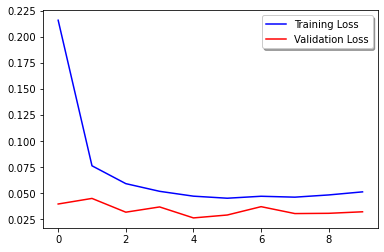

In [14]:
# ploting the learning curves
fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], color='b', label="Training Loss")
ax.plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax.legend(loc='best', shadow=True)

In [15]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.26999807357788


In [19]:
y_pred = model.predict(x_test)

In [20]:
def draw_output(idx_nums):
    plt.figure(figsize = (20, 20))
    plt.xticks( range(10) )
    x = np.ceil(np.sqrt(len(idx_nums)))
    cnt = 1
    for ph in idx_nums:
        plt.subplot(x, x, cnt)
        curr_photo = y_test[ph]
        
        plt.xlim(0, 10)
        plt.title("Digit: {0}\n idx: {1} ".format(np.argmax(y_test[ph]), ph), fontsize = 10) 
        plt.bar(range(10), y_pred[ph])
        
        cnt += 1

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


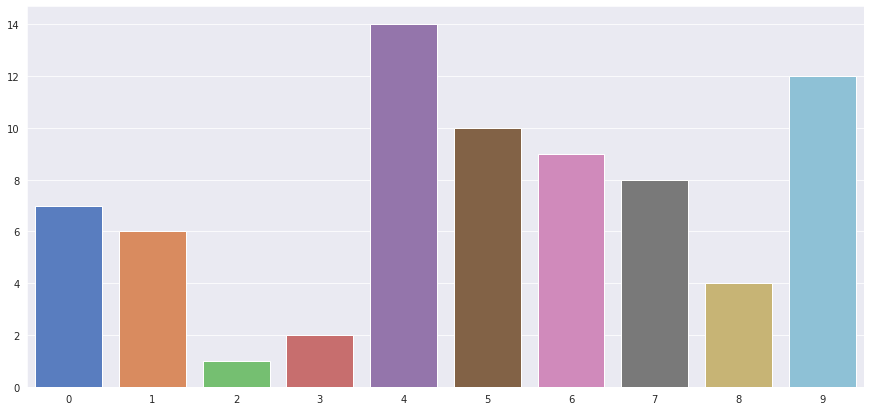

In [22]:
cnt_error = []
for idx, (a, b) in enumerate(zip(y_test, y_pred)):
    if np.argmax(a) == np.argmax(b): continue
    cnt_error.append( (np.argmax(a)) )

cnt_error = np.unique(cnt_error, return_counts = True)
sns.set_style("darkgrid")
plt.figure(figsize = (15, 7))
bar_plot = sns.barplot(cnt_error[0], cnt_error[1], palette="muted")
plt.show()

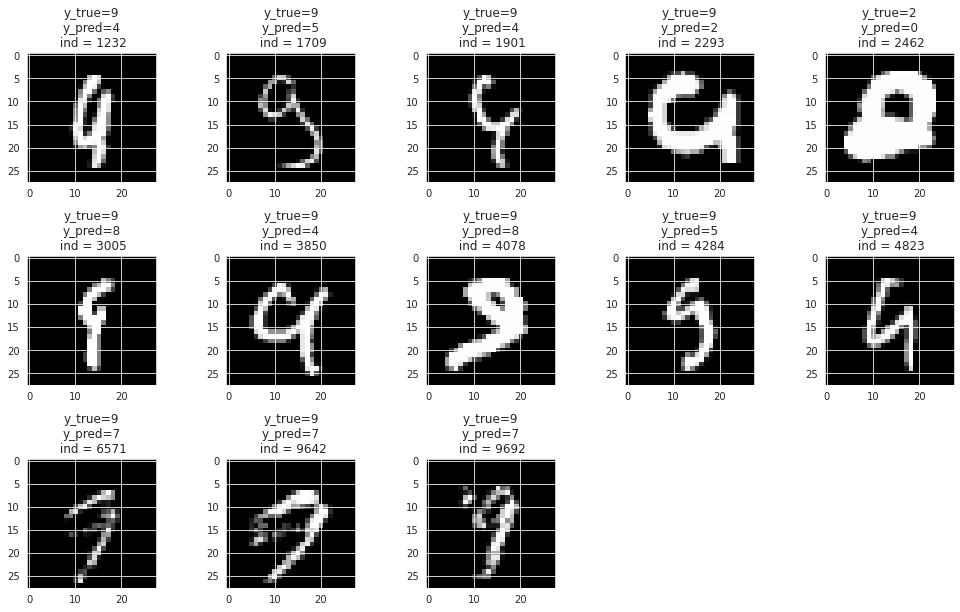

In [23]:
cnt_ind = 1
list_idx = []
X_val_plot = x_test.reshape( x_test.shape[:-1] )
fig = plt.figure(figsize=(14, 14))

for idx, (a, b) in enumerate(zip(y_test, y_pred)):
    if np.argmax(a) == np.argmax(b): continue
    if (np.argmax(a) == 2 or np.argmax(a) == 9):    
        plt.subplot(5, 5, cnt_ind)
        plt.imshow(X_val_plot[idx], cmap='gray', interpolation='none')
        plt.title('y_true={0}\ny_pred={1}\n ind = {2}'.format(np.argmax(a), np.argmax(b), idx))
        plt.tight_layout()
        list_idx.append(idx)
        cnt_ind += 1

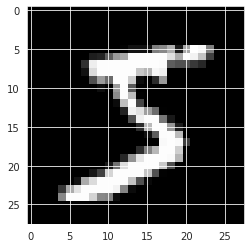

In [25]:
image = x_train[0]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [26]:
image.shape[0],image.shape[1],image.shape[2]

(28, 28, 1)

In [27]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1,input_shape[0],input_shape[1],input_shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(np.argmax(yhat)))

Predicted: 5


In [28]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

<AxesSubplot:>

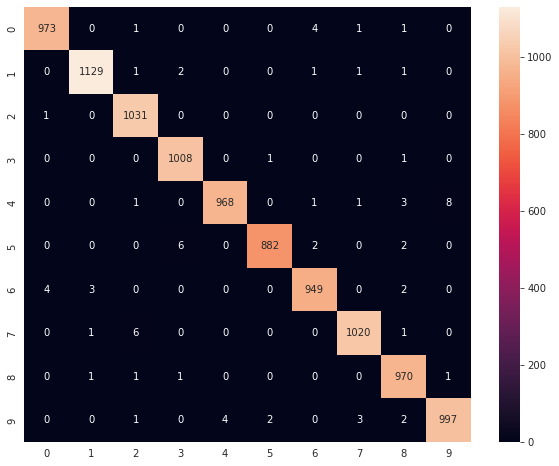

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [30]:
model.save('hand_written_digits_CNN.h5')

In [31]:
model = tf.keras.models.load_model('hand_written_digits_CNN.h5')

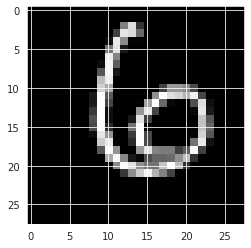

In [32]:
image = x_test[100]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [33]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1,input_shape[0],input_shape[1],input_shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(np.argmax(yhat)))

Predicted: 6


In [47]:
!tar -zcvf model.tgz hand_written_digits_CNN.h5

hand_written_digits_CNN.h5


In [48]:
!pip install watson-machine-learning-client

In [49]:
!pip install ibm_watson_machine_learning

In [50]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://jp-tok.ml.cloud.ibm.com",
    "apikey":"Y0hOkxEIr9-Qwjc7rRJqcboPqPn2GdjCddwHsedqsc8N"
}
client = APIClient(wml_credentials)
client

In [55]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:jp-tok:a/524e172ba7c744c1ae8435ceeccab5fc:6ac38ae4-5917-4c63-aa14-ff8129796a7b::',
      'guid': '6ac38ae4-5917-4c63-aa14-ff8129796a7b',
      'name': 'Watson Machine Learning-ky',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'IBM_smartinternz',
    'scope': {'bss_account_id': '524e172ba7c744c1ae8435ceeccab5fc'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'be5c9370-2c59-49ce-94e7-d0462de23e26',
      'bucket_region': 'jp-tok-standard',
      'credentials': {'admin': {'access_key_id': 'f22b7f2c84f04f87a4d6af8327111d57',
        'api_key': 'asvm2YHFY6xRL7OwEOP21ldA8WoIrme4g-Gzt4BYVexc',
        'secret_access_key': 'b657d0f1a776def8c50a2540bac9e2461906a9b752d3a869',
        'service_id': 'ServiceId-918a45cc-7ae6-4169-8182-5af4743b8685'},
       'editor': {'access_key_id': '2198f4d2b3514969b101a31c0ef92021',
       

In [56]:
space_id = 'f5b3e32f-adf0-45f4-918c-88ac9ee62536'

In [57]:
client.set.default_space(space_id)

'SUCCESS'

In [58]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [59]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [60]:
model_details = client.repository.store_model(model='model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME : 'A Novel Method for Handwritten Digit Recognition System',
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T14:48:56.542Z',
  'id': '297e6bfe-2563-47ed-b237-e80320e962a7',
  'modified_at': '2022-11-18T14:49:00.469Z',
  'name': 'A Novel Method for Handwritten Digit Recognition System',
  'owner': 'IBMid-6620040MFZ',
  'resource_key': '86c02c02-e446-4a02-9441-70b13b325a5d',
  'space_id': 'f5b3e32f-adf0-45f4-918c-88ac9ee62536'},
 'system': {'warnings': []}}

In [61]:
model_id = client.repository.get_model_id(model_details)
model_id

'297e6bfe-2563-47ed-b237-e80320e962a7'

In [62]:
client.repository.download(model_id,'model.tar.gb')

Successfully saved model content to file: 'model.tar.gb'


'/home/wsuser/work/model.tar.gb'

In [63]:
ls -1

hand_written_digits_CNN.h5
model.tar.gb
model.tgz
